In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\plots\\'

In [2]:
###########################################
##### Quant-seq global log2FC boxplot #####
###########################################

loess_df = pd.read_csv('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\loess_norm_count_table.txt', sep="\t")
# remove spike-ins
loess_df = loess_df.iloc[:-44, :]
# select only MEDs, CDK9, dCDK9, dBET6
hitlist = ['MED1_DMSO', 'MED1_dTAG_7', 'MED10_DMSO', 'MED10_dTAG_7', 'MED12_DMSO', 'MED12_dTAG_7', 'MED14_DMSO', 'MED14_dTAG_7', 'MED26_DMSO', 'MED26_dTAG_7', 'MED28_DMSO', 'MED28_dTAG_7', 'MED31_DMSO', 'MED31_dTAG_7', 'MED6_DMSO', 'MED6_dTAG_7', 'CDK9_DMSO', 'CDK9_dTAG_7', 'WT_DMSO', 'WT_dTAG_7', 'WT_ZZ_133b', 'WT_dBET6']

av_df=pd.DataFrame()
av_df['geneID'] = loess_df.iloc[:,0]

for hit in hitlist:
    av_df[hit + '_av'] = loess_df.loc[:, [hit+'_A', hit+'_B', hit+'_C']].mean(axis=1)

# filter out genes with cpm < 32 (= log2cpm < 5.0) in WT_DMSO_av => to avoid weird fold changes; cutoff is based on the cpm distribution ("loess_comparison_MED14.pdf")
av_df = av_df[av_df.WT_DMSO_av > 32]

hitnames = ['WT_dTAG_7', 'MED1', 'MED12', 'MED31', 'MED28', 'MED26', 'MED6', 'MED10', 'MED14', 'WT_ZZ_133b', 'CDK9', 'WT_dBET6']
l2fc_df=pd.DataFrame()
# add the ENSG ID
l2fc_df['geneID'] = av_df.iloc[:,0]
for name in hitnames:
    if name.startswith('WT_'):
        l2fc_df[name + '_l2fc'] = np.log2(av_df[name + '_av'] / av_df['WT_DMSO_av'])
    else:
        l2fc_df[name + '_l2fc'] = np.log2(av_df[name + '_dTAG_7_av'] / av_df[name + '_DMSO_av'])

l2fc_df = l2fc_df.set_index('geneID').dropna()

#l2fc_df.to_excel('W:\lab_winter\private\Experiments\Matthias_MB\\2018\MB18_56 QuantSeq merge analysis\\data\\8MEDs_3drugs_l2fc_manual_for_violinplot.xlsx')


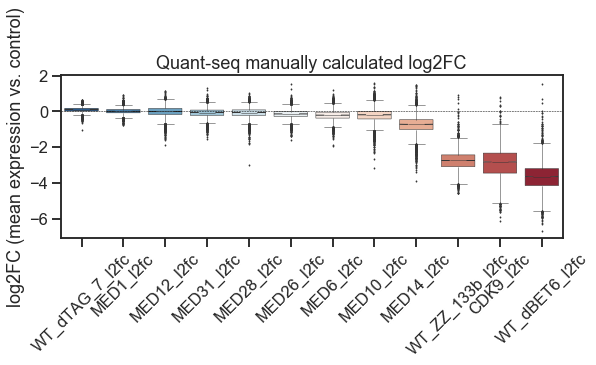

In [51]:
###########################################
##### Quant-seq global log2FC boxplot #####
###########################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(9,3))

plt.axhline(y=0, linestyle='dashed', linewidth=0.5, color="black")

sns.boxplot(data=l2fc_df, linewidth=0.5, fliersize=1, notch=True, palette="RdBu_r")


plt.title('Quant-seq manually calculated log2FC')
plt.yticks([-6,-4,-2,0,2])
plt.xticks(rotation=45)
plt.ylabel('log2FC (mean expression vs. control)')

#plt.show()
plt.savefig(plots_dir + 'violinplots_log2FC\\manual_log2FC_allMEDs_WT+3drugs_boxplot_9x3.pdf', dpi=300)
plt.savefig(plots_dir + 'violinplots_log2FC\\manual_log2FC_allMEDs_WT+3drugs_boxplot_9x3.png', dpi=300)

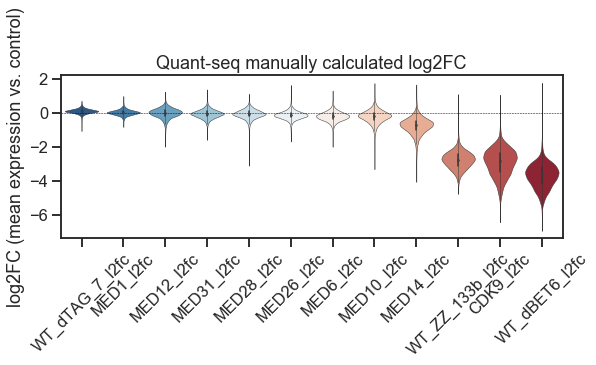

MED14 vs. dCDK9 	MannwhitneyuResult(statistic=517071.0, pvalue=0.0)
MED14 vs. CDK9 	MannwhitneyuResult(statistic=762159.0, pvalue=0.0)
MED14 vs. dBET6 	MannwhitneyuResult(statistic=188110.0, pvalue=0.0)


In [3]:
###########################################
##### Quant-seq global log2FC violinplot #####
###########################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(9,3))

plt.axhline(y=0, linestyle='dashed', linewidth=0.5, color="black")

sns.violinplot(data=l2fc_df, linewidth=0.5, scale="width", palette="RdBu_r")

plt.title('Quant-seq manually calculated log2FC')
plt.yticks([-6,-4,-2,0,2])
plt.xticks(rotation=45)
plt.ylabel('log2FC (mean expression vs. control)')

plt.show()
#plt.savefig(plots_dir + 'violinplots_log2FC\\manual_log2FC_allMEDs_WT+3drugs_violinplot_9x3.pdf', dpi=300)
#plt.savefig(plots_dir + 'violinplots_log2FC\\manual_log2FC_allMEDs_WT+3drugs_violinplot_9x3.png', dpi=300)

print "MED14 vs. dCDK9 \t", sc.stats.mannwhitneyu(l2fc_df.MED14_l2fc, l2fc_df.WT_ZZ_133b_l2fc)
print "MED14 vs. CDK9 \t", sc.stats.mannwhitneyu(l2fc_df.MED14_l2fc, l2fc_df.CDK9_l2fc)
print "MED14 vs. dBET6 \t", sc.stats.mannwhitneyu(l2fc_df.MED14_l2fc, l2fc_df.WT_dBET6_l2fc)


In [9]:
sns.violinplot?